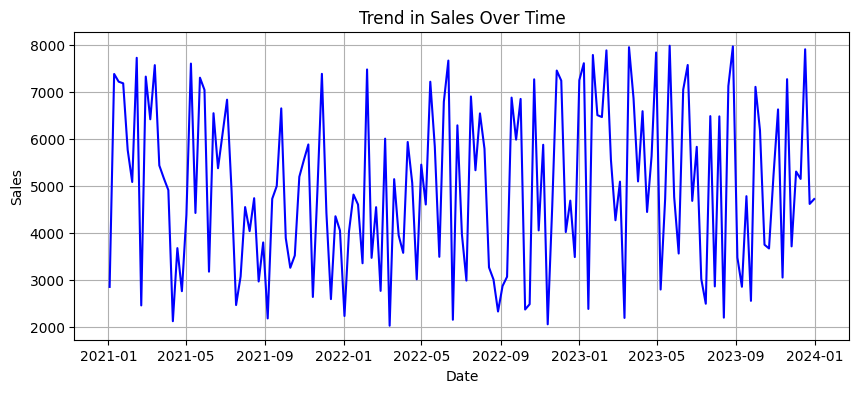

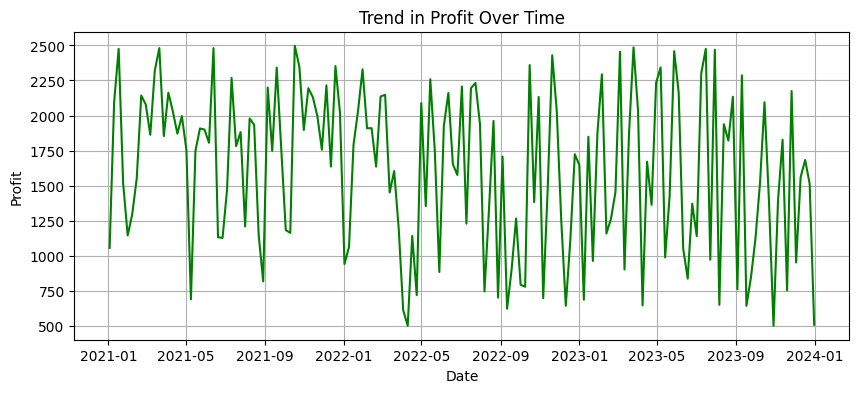

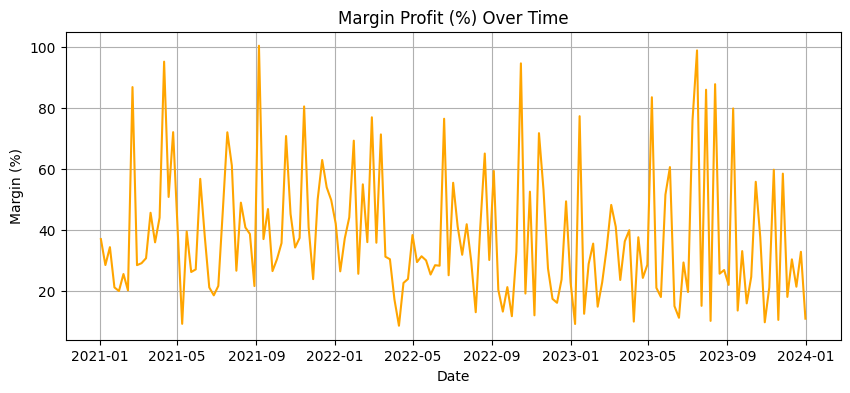

/tmp/ipython-input-3919119710.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Holiday_Season', y='Sales', palette='coolwarm')


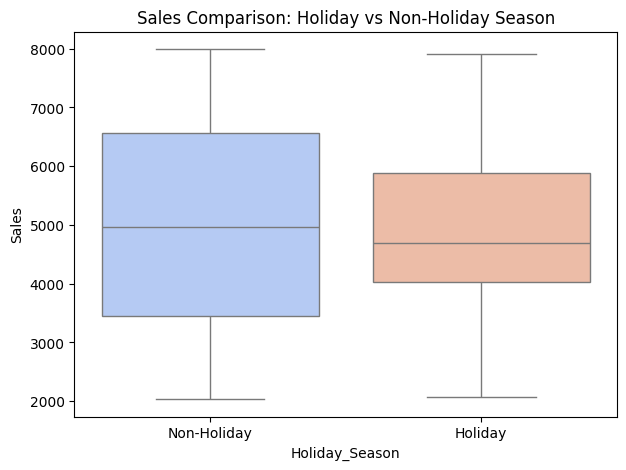

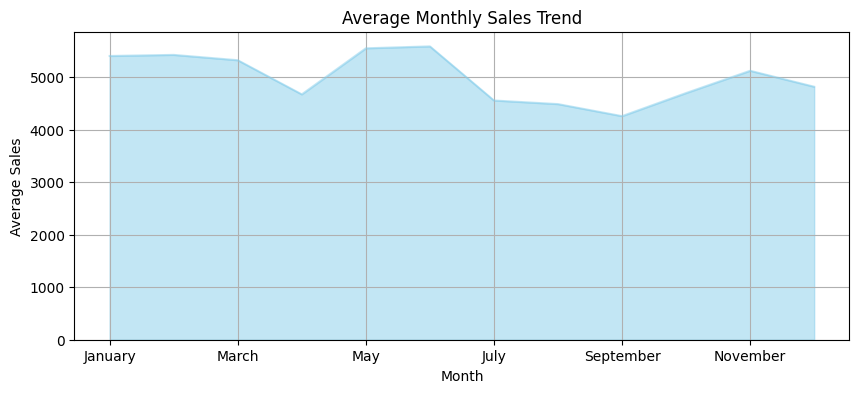

In [1]:
# Task 9a: Sales Trend Analysis and Visualization
!pip install pandas matplotlib seaborn plotly -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

date_rng = pd.date_range(start='2021-01-01', end='2023-12-31', freq='W')
np.random.seed(42)
data = pd.DataFrame({
    'Date': date_rng,
    'Sales': np.random.randint(2000, 8000, size=len(date_rng)),
    'Profit': np.random.randint(500, 2500, size=len(date_rng))
})

data['Month'] = data['Date'].dt.month_name()
data['Year'] = data['Date'].dt.year
data['Margin_Profit'] = round((data['Profit'] / data['Sales']) * 100, 2)

# Define some holidays (e.g., December & Diwali season)
data['Holiday_Season'] = data['Date'].dt.month.isin([11, 12])


#  Trend in Sales
plt.figure(figsize=(10, 4))
sns.lineplot(data=data, x='Date', y='Sales', color='blue')
plt.title('Trend in Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


# Profit Trend
plt.figure(figsize=(10, 4))
sns.lineplot(data=data, x='Date', y='Profit', color='green')
plt.title('Trend in Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# Margin Profit (Profit/Sales)
plt.figure(figsize=(10, 4))
sns.lineplot(data=data, x='Date', y='Margin_Profit', color='orange')
plt.title('Margin Profit (%) Over Time')
plt.xlabel('Date')
plt.ylabel('Margin (%)')
plt.grid(True)
plt.show()


# Compare Sales During Holiday vs Non-Holiday
plt.figure(figsize=(7, 5))
sns.boxplot(data=data, x='Holiday_Season', y='Sales', palette='coolwarm')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.title('Sales Comparison: Holiday vs Non-Holiday Season')
plt.ylabel('Sales')
plt.show()


#  Monthly Average Sales Trend
monthly_sales = data.groupby('Month')['Sales'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.figure(figsize=(10, 4))
monthly_sales.plot(kind='area', alpha=0.5, color='skyblue')
plt.title('Average Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()


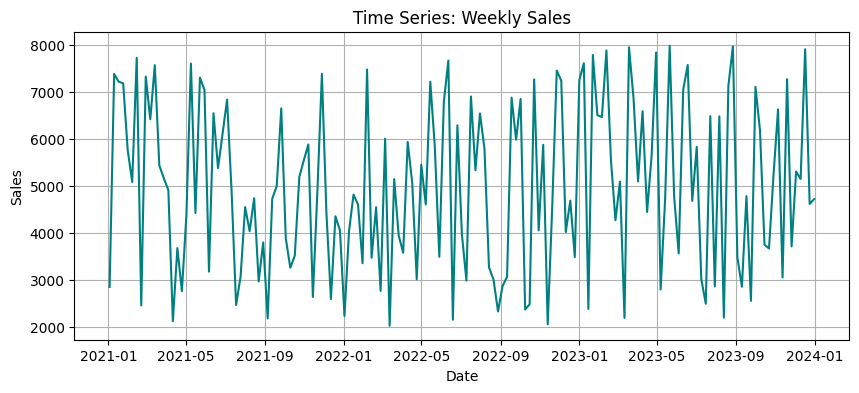

/tmp/ipython-input-207159900.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Month', y='Sales', palette='viridis')


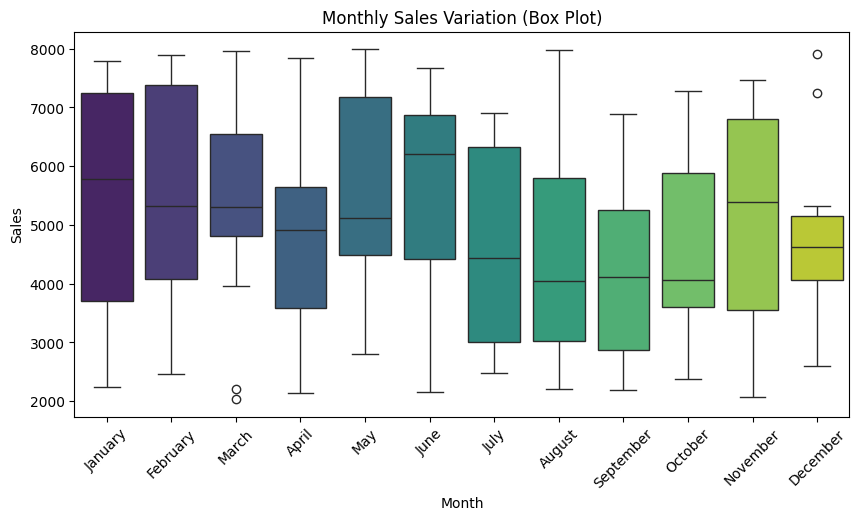

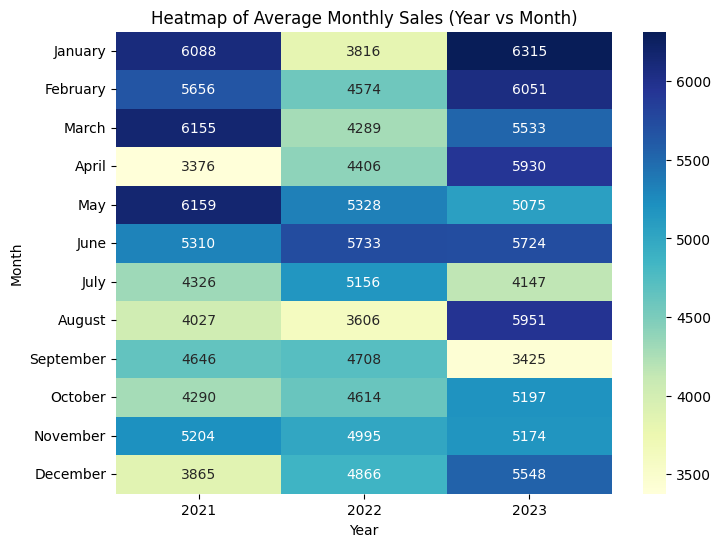

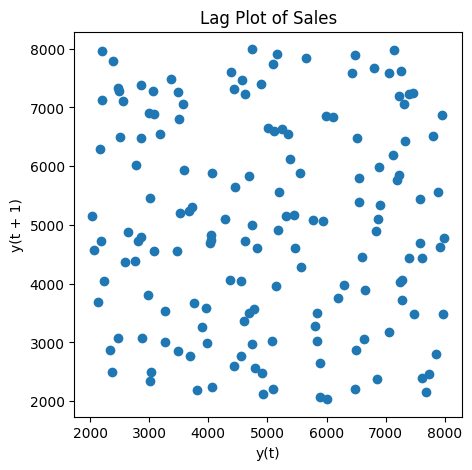

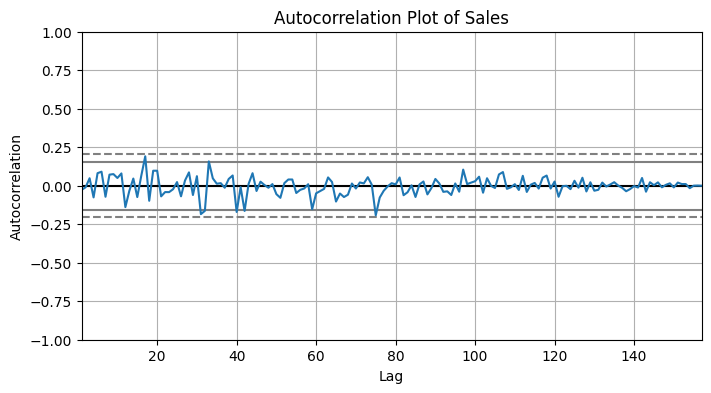

In [2]:
# Task 9b: Explore Time Series Data


import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot
import seaborn as sns


# 1️⃣ Line Plot (Sales over time)
plt.figure(figsize=(10, 4))
sns.lineplot(data=data, x='Date', y='Sales', color='teal')
plt.title('Time Series: Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


# 2️⃣ Box Plot (Monthly variation)
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Month', y='Sales', palette='viridis')
plt.title('Monthly Sales Variation (Box Plot)')
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Heatmap (Year vs Month)
pivot_data = data.pivot_table(index='Month', columns='Year', values='Sales', aggfunc='mean')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
pivot_data = pivot_data.reindex(month_order)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Heatmap of Average Monthly Sales (Year vs Month)')
plt.show()

# 4️⃣ Lag Plot (To identify serial correlation)
plt.figure(figsize=(5, 5))
lag_plot(data['Sales'])
plt.title('Lag Plot of Sales')
plt.show()

# 5️⃣ Autocorrelation Plot (Identify trend/seasonality)
plt.figure(figsize=(8, 4))
autocorrelation_plot(data['Sales'])
plt.title('Autocorrelation Plot of Sales')
plt.show()
